# Introduction

This notebook contains the data analysis and visualisations required for the Visit Scotland Final Project at CodeClan.

The data for this project is open source and available through statistics.gov.scot

There are seven data sets that have been cleaned, wrangled and analysed to answer a series of business questions. The data concerns people that have traveled to Scotland from parts of the UK as a 'tourist'. The `international` data set was collected from the Scottish Tourism Observatory and concerns people visiting Scotland from abroad. This was supplementary data which was used to enrich the project and get a better understanding of people's habits.

In a separate notebook, predictive modeling was attempted to address the final business question.

This notebook has cherry picked visualisations from a separate notebook (data_analysis_and_visualisations) which was used to complete the initial analysis.

### Business Questions:

* What kind of tourism activity generates the highest income for Scotland?
* Which kind of activity generates the most visits to sites?
* Is there a particular key demographic of visitors we should be focusing on? 
    * Who spends the most? 
    * Who visits the most?
* What type of locations receive the most visits?
    * What kinds of locations do people spend the most in?
* Is there a particular method of travel our visitors arrive by?
    * Some of our locations are remote and not easily accessible by public transport, so this would be good information to have.
* When looking at regional tourism, what insights can we gain?
    * Where are our visitors from?
    * How do they differ in the money they spend, nights they spend in Scotland, or number of visits they do?
* What type of accommodation is most popular?
    * Is there a difference by location?
* How have general tourism rates changed over time?
* Is there any way to predict spending and visits for Visit Scotland?

### Load in pandas, seaborn, matplotlib and data

In [307]:
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

regional_tourism = pd.read_csv('clean_data/regional_tourism.csv')

accommodation_occupancy = pd.read_csv('clean_data/accommodation_occupancy.csv')

activities = pd.read_csv('clean_data/activities.csv')

demographics = pd.read_csv('clean_data/demographics.csv')

locations = pd.read_csv('clean_data/location.csv')

transport = pd.read_csv('clean_data/transport.csv')

international = pd.read_csv('clean_data/international.csv')

# Question 1.1

## What kind of tourism activity generates the highest income for Scotland?

The raw data was manipulated so that activities could be grouped together into more appropriate groups.

In [308]:
(
    activities
    .loc[(activities.activity_type != 'All') & (activities.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('activity_type')
    .value
    .sum()
    .sort_values(ascending=False)
)

activity_type
Drinking & Dining          20549
Leisure activity           11587
Shopping                   10222
Visiting family/friends    10142
Other                       7084
Live event                  5481
Entertainment               4240
Tourist attraction          3251
Excursions                  2721
Name: value, dtype: int64

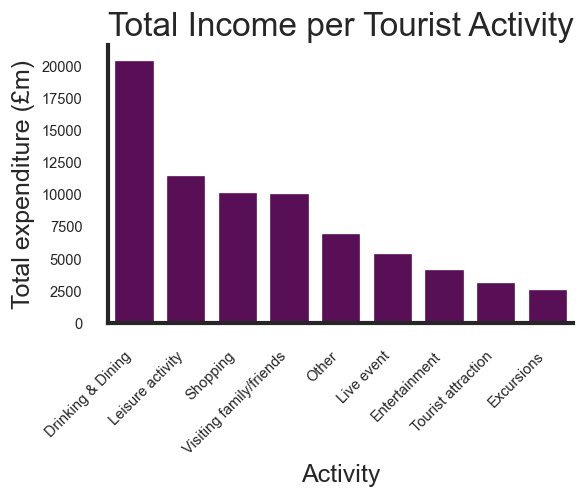

In [399]:
sns.set_style('white')

sns.set_context('poster', font_scale=0.4)
plt.rcParams['figure.figsize'] = [5, 3]
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 10

a=sns.barplot(data=(
    activities
    .loc[(activities.activity_type != 'All') &
         (activities.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('activity_type')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditue')
),
            x='activity_type',
            y='total_expenditue',
           color='#650360')

sns.despine()
a.set_xlabel('Activity', fontsize = 15)
a.set_ylabel('Total expenditure (£m)', fontsize = 15)
a.set_title('Total Income per Tourist Activity', fontsize = 20)

plt.xticks(rotation=45, ha='right')

plt.show()

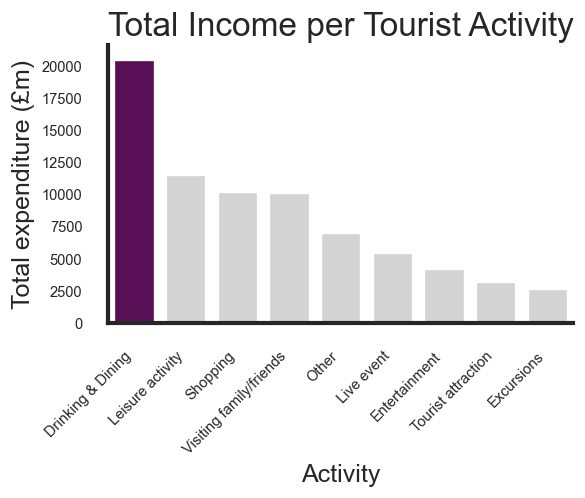

In [310]:
sns.set_style('white')

sns.set_context('poster', font_scale=0.4)
plt.rcParams['figure.figsize'] = [5, 3]
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 10

a=sns.barplot(data=(
    activities
    .loc[(activities.activity_type != 'All') &
         (activities.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('activity_type')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditue')
),
            x='activity_type',
            y='total_expenditue',
           palette=['#650360', 'lightgrey', 'lightgrey', 'lightgrey',
                    'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey'])

sns.despine()
a.set_xlabel('Activity', fontsize = 15)
a.set_ylabel('Total expenditure (£m)', fontsize = 15)
a.set_title('Total Income per Tourist Activity', fontsize = 20)

plt.xticks(rotation=45, ha='right')

plt.show()

It can clearly be seen that Drinking & Dining generates the highest expenditure at over £2000 million across 2013-2019.

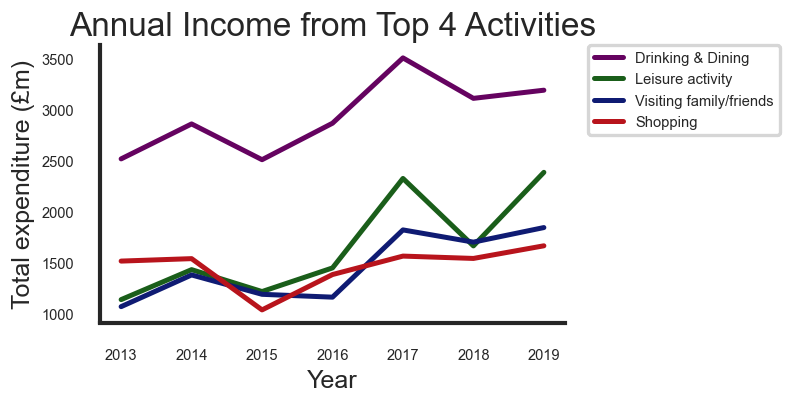

In [311]:
b=sns.lineplot(data=(
    activities
    .loc[(activities.activity_type.isin(['Drinking & Dining', 'Leisure activity',
                                         'Shopping', 'Visiting family/friends'])) &
         (activities.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby(['year', 'activity_type'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure_per_year')
),
             x='year',
             y='total_expenditure_per_year',
            hue='activity_type',
              palette=['#650360', '#1a5e1a', '#0f1b73', '#b8141c'])

sns.despine()
b.set_xlabel('Year', fontsize = 15)
b.set_ylabel('Total expenditure (£m)', fontsize = 15)
b.set_title('Annual Income from Top 4 Activities', fontsize = 20)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

Text(0.5, 1.0, 'Annual Income from Drinking & Dining')

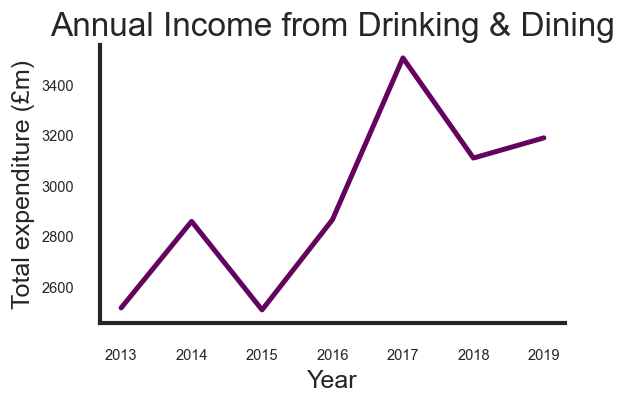

In [312]:

b=sns.lineplot(data=(
    activities
    .loc[(activities.activity_type == 'Drinking & Dining') &
         (activities.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby(['year', 'activity_type'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure_per_year')
),
             x='year',
             y='total_expenditure_per_year',
              color='#650360')

sns.despine()
b.set_xlabel('Year', fontsize = 15)
b.set_ylabel('Total expenditure (£m)', fontsize = 15)
b.set_title('Annual Income from Drinking & Dining', fontsize = 20)

When looking at this activity across the year 2013-2019, it can be seen that there is a general increasing trend with a trough in 2015 and a large peak in 2017.

Text(0.5, 1.0, 'Annual Income from Leisure Activities')

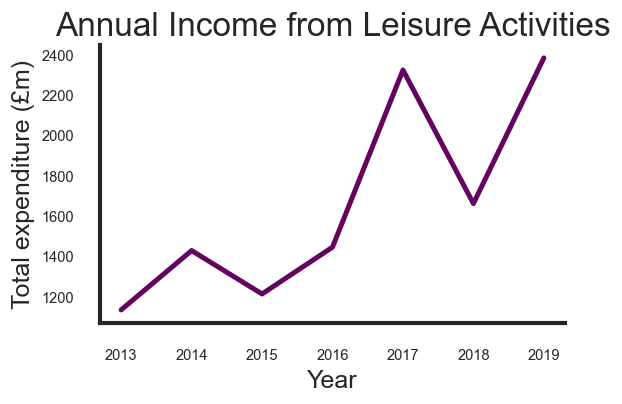

In [313]:
c=sns.lineplot(data=(
    activities
    .loc[(activities.activity_type == 'Leisure activity') &
         (activities.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby(['year', 'activity_type'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure_per_year')
),
             x='year',
             y='total_expenditure_per_year',
              color='#650360')

sns.despine()
c.set_xlabel('Year', fontsize = 15)
c.set_ylabel('Total expenditure (£m)', fontsize = 15)
c.set_title('Annual Income from Leisure Activities', fontsize = 20)

When looking at Leisure activities, the upward trend is very apparent, despite a lull in 2018.

Text(0.5, 1.0, 'Annual Income from Shopping')

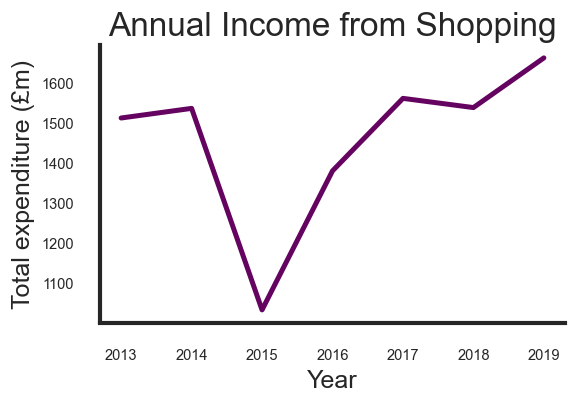

In [314]:
d=sns.lineplot(data=(
    activities
    .loc[(activities.activity_type == 'Shopping') &
         (activities.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby(['year', 'activity_type'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure_per_year')
),
             x='year',
             y='total_expenditure_per_year',
              color='#650360')

sns.despine()
d.set_xlabel('Year', fontsize = 15)
d.set_ylabel('Total expenditure (£m)', fontsize = 15)
d.set_title('Annual Income from Shopping', fontsize = 20)

Shopping is the 3rd biggest overall expenditure, although there has not been large amounts of growth from 2013-2019. The activity took a sharp decrease from 2014-2015 before recovering and increasing slightly overall.

Text(0.5, 1.0, 'Annual Income from Visiting Family & Friends')

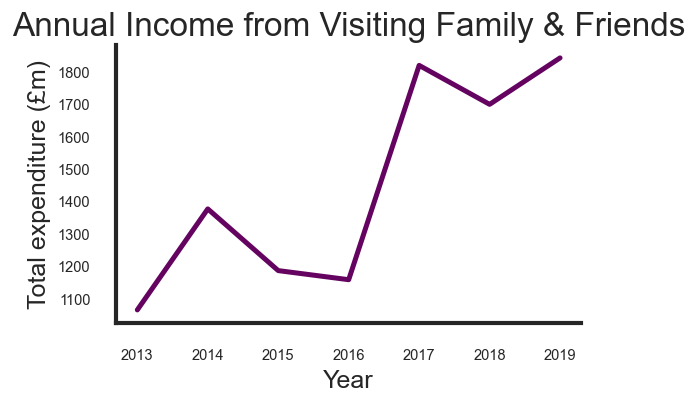

In [315]:
e=sns.lineplot(data=(
    activities
    .loc[(activities.activity_type == 'Visiting family/friends') &
         (activities.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby(['year', 'activity_type'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure_per_year')
),
             x='year',
             y='total_expenditure_per_year',
              color='#650360')

sns.despine()
e.set_xlabel('Year', fontsize = 15)
e.set_ylabel('Total expenditure (£m)', fontsize = 15)
e.set_title('Annual Income from Visiting Family & Friends', fontsize = 20)

Income generated from people visiting family and friends is large and has a very positive increasing trend since 2016.

# Question 1.2

## Which kind of activity generates the most visits to sites?

In [3]:
(
    activities
    .loc[(activities.activity_type != 'All') & (activities.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('activity_type')
    .value
    .sum()
    .sort_values(ascending=False)
)

NameError: name 'activities' is not defined

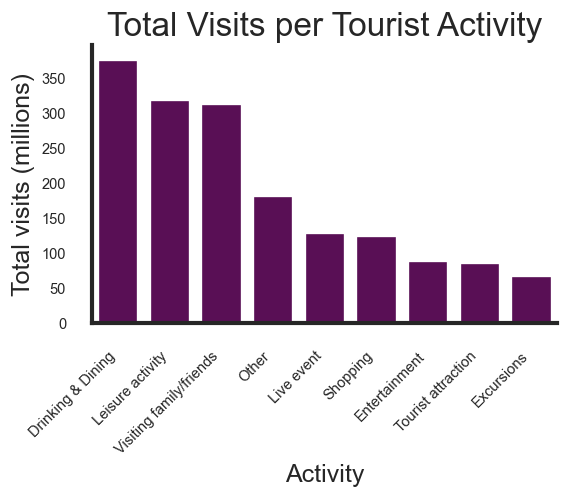

In [317]:
f=sns.barplot(data=(
    activities
    .loc[(activities.activity_type != 'All') & (activities.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('activity_type')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
),
            x='activity_type',
            y='total_visits',
           color='#650360')

sns.despine()
f.set_xlabel('Activity', fontsize = 15)
f.set_ylabel('Total visits (millions)', fontsize = 15)
f.set_title('Total Visits per Tourist Activity', fontsize = 20)

plt.xticks(rotation=45, ha='right')

plt.show()

Drinking & Dining is again the activity which has generated the most visits to Scotland, with over 350 million from 2013-2019. Leisure activities and visiting family/friends are similar and slightly less than drinking & dining.

Text(0.5, 1.0, 'Annual Visits from Drinking & Dining')

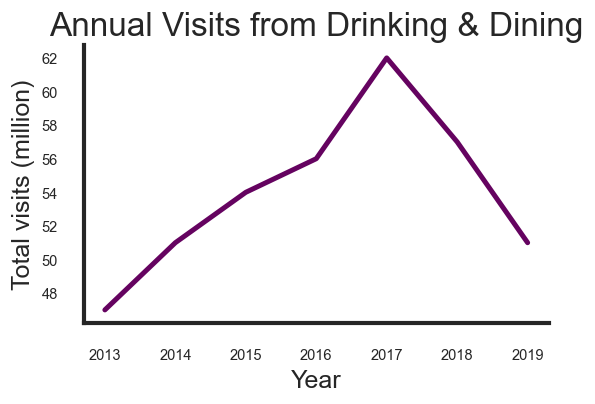

In [318]:
g=sns.lineplot(data=(
    activities
    .loc[(activities.activity_type == 'Drinking & Dining') &
         (activities.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby(['year', 'activity_type'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits_per_year')
),
             x='year',
             y='total_visits_per_year',
              color='#650360')

sns.despine()
g.set_xlabel('Year', fontsize = 15)
g.set_ylabel('Total visits (million)', fontsize = 15)
g.set_title('Annual Visits from Drinking & Dining', fontsize = 20)

Despite a large period of growth from 2013-2017, and the total expenditure being largely unaffected, the annual visits from drinking & dining have shown a period of decline from 2017. It must be said that the accuracy of the data can be questioned as people will partake in more than one activity.

Text(0.5, 1.0, 'Annual Visits from Leisure Activities')

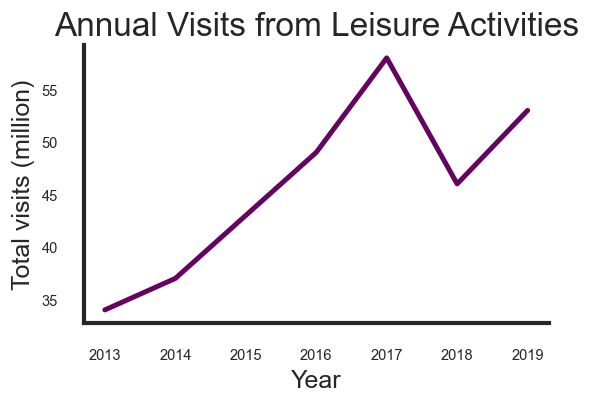

In [319]:
h=sns.lineplot(data=(
    activities
    .loc[(activities.activity_type == 'Leisure activity') &
         (activities.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby(['year', 'activity_type'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits_per_year')
),
             x='year',
             y='total_visits_per_year',
              color='#650360')

sns.despine()
h.set_xlabel('Year', fontsize = 15)
h.set_ylabel('Total visits (million)', fontsize = 15)
h.set_title('Annual Visits from Leisure Activities', fontsize = 20)

Leisure activities have experienced general growth from 2013-2019

Text(0.5, 1.0, 'Annual Visits from People Visiting Family & Friends')

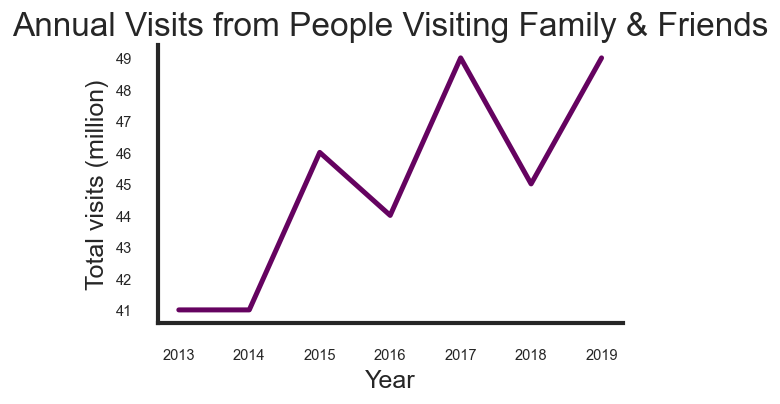

In [320]:
i=sns.lineplot(data=(
    activities
    .loc[(activities.activity_type == 'Visiting family/friends') &
         (activities.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby(['year', 'activity_type'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits_per_year')
),
             x='year',
             y='total_visits_per_year',
              color='#650360')

sns.despine()
i.set_xlabel('Year', fontsize = 15)
i.set_ylabel('Total visits (million)', fontsize = 15)
i.set_title('Annual Visits from People Visiting Family & Friends', fontsize = 20)

# Question 2

## Is there a particular key demographic of visitors we should be focusing on?
## Who spends the most?
## Who visits the most?

The demographics data set is set out in such a way that it is difficult to fully analyse all of the different demographic variables at once, as they are set to 'All' by default when one single variable is being changed.

To have an overview of the data, a new column was mutated to record instances of when 'All' was not being recorded.

In [321]:
demographics = (
    demographics
    .assign(demo = np.where(demographics.age != 'All', demographics.age,
                   np.where(demographics.marital_status != 'All', demographics.marital_status,
                   np.where(demographics.gender != 'All', demographics.gender,
                   np.where(demographics.employment_status != 'All', demographics.employment_status,
                   np.where(demographics.children != 'All', demographics.children,
                   np.where(demographics.access_to_car != 'All', demographics.access_to_car,
                   np.where(demographics.social_grade != 'All', demographics.social_grade, 'All')))))))
           )
)

demographics

,year,units,value,breakdown_of_domestic_tourism,age,marital_status,gender,employment_status,children,access_to_car,social_grade,demo
0,2013,Million Visits,22,Visits,45-54 years,All,All,All,All,All,All,45-54 years
1,2013,Million Visits,58,Visits,All,All,Male,All,All,All,All,Male
2,2016,Million Visits,23,Visits,25-34 years,All,All,All,All,All,All,25-34 years
3,2019,Million Visits,56,Visits,All,Not Married,All,All,All,All,All,Not Married
4,2015,Million Visits,52,Visits,All,Not Married,All,All,All,All,All,Not Married
...,...,...,...,...,...,...,...,...,...,...,...,...
303,2019,million pounds (GBP),715,Expenditure,All,All,All,Unemployed/not working,All,All,All,Unemployed/not working
304,2018,Million Visits,15,Visits,All,All,All,Unemployed/not working,All,All,All,Unemployed/not working
305,2015,Million Visits,15,Visits,All,All,All,Unemployed/not working,All,All,All,Unemployed/not working
306,2013,Million Visits,46,Visits,All,All,All,Unemployed/not working,All,All,All,Unemployed/not working


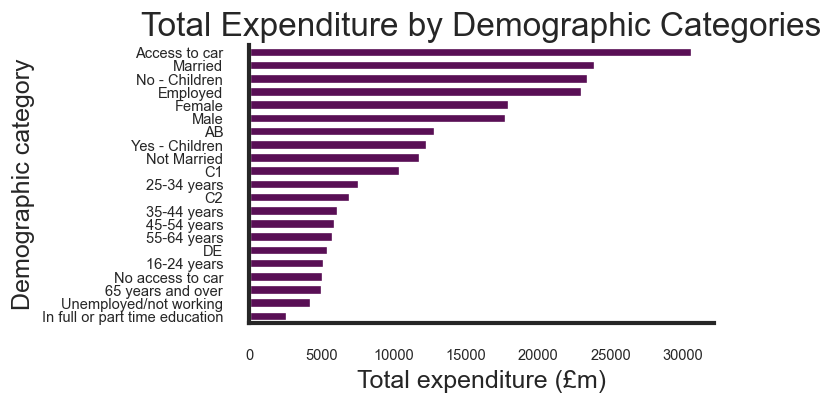

In [322]:
j=sns.barplot(data=(
    demographics
    .loc[(demographics.demo != 'All') & (demographics.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .replace({'Employed/self-employed (full or part time)': 'Employed',
             'Access to car (1+)': 'Access to car',
             'No access to car (0)': 'No access to car'})
    .groupby('demo')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
),
            x='total_expenditure',
            y='demo',
            color='#650360')

sns.despine()
j.set_xlabel('Total expenditure (£m)', fontsize = 15)
j.set_ylabel('Demographic category', fontsize = 15)
j.set_title('Total Expenditure by Demographic Categories', fontsize = 20)

plt.show()

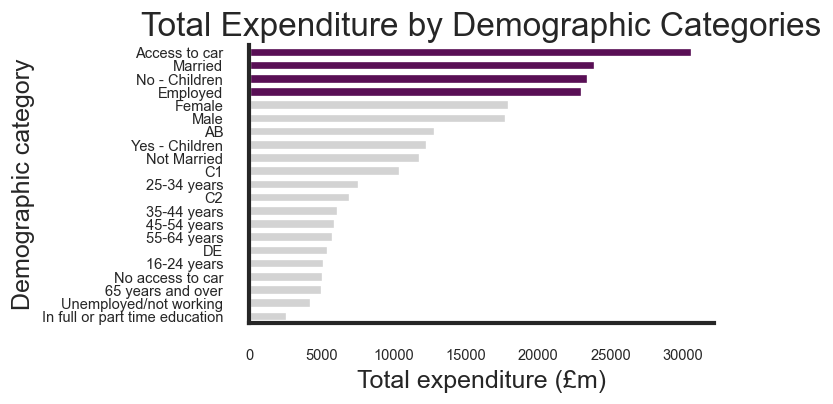

In [323]:
j=sns.barplot(data=(
    demographics
    .loc[(demographics.demo != 'All') & (demographics.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .replace({'Employed/self-employed (full or part time)': 'Employed',
             'Access to car (1+)': 'Access to car',
             'No access to car (0)': 'No access to car'})
    .groupby('demo')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
),
            x='total_expenditure',
            y='demo',
            palette=['#650360', '#650360', '#650360', '#650360',
                    'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey',
                    'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey',
                    'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey',
                    'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey',
                    'lightgrey'])

sns.despine()
j.set_xlabel('Total expenditure (£m)', fontsize = 15)
j.set_ylabel('Demographic category', fontsize = 15)
j.set_title('Total Expenditure by Demographic Categories', fontsize = 20)

plt.show()

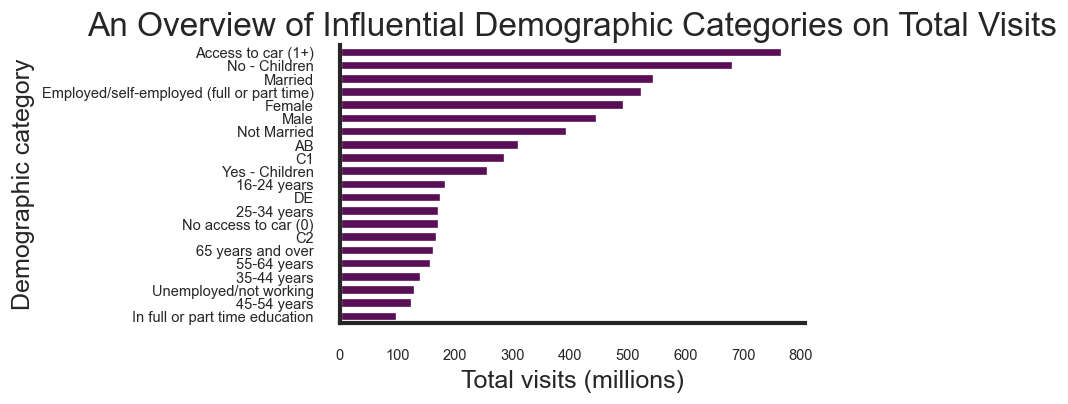

In [324]:
k=sns.barplot(data=(
    demographics
    .loc[(demographics.demo != 'All') & (demographics.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('demo')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
),
            x='total_visits',
            y='demo',
            color='#650360')

sns.despine()
k.set_xlabel('Total visits (millions)', fontsize = 15)
k.set_ylabel('Demographic category', fontsize = 15)
k.set_title('An Overview of Influential Demographic Categories on Total Visits', fontsize = 20)

plt.show()

From these plots it is easy to begin to build a picture of a target demographic:

* has access to a car (more on this in the transport section)
* does not have children
* is married
* is employed

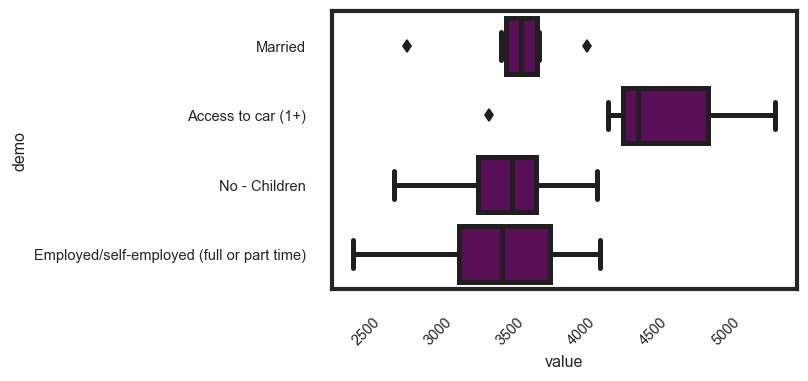

In [325]:
sns.boxplot(data=(
    demographics
    .loc[(demographics.demo.isin(['Access to car (1+)',
                                  'No - Children',
                                  'Married',
                                  'Employed/self-employed (full or part time)'])) &
         (demographics.breakdown_of_domestic_tourism == 'Expenditure'), :]
),
            x='value',
            y='demo',
            color='#650360')

plt.xticks(rotation=45, ha='right')

plt.show()

Looking at the age demographic in more detail

In [326]:
(
    demographics
    .loc[(demographics.age != 'All') & (demographics.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('age')
    .value
    .sum()
    .sort_values(ascending=False)
)

age
25-34 years          7598
35-44 years          6137
45-54 years          5939
55-64 years          5792
16-24 years          5217
65 years and over    5070
Name: value, dtype: int64

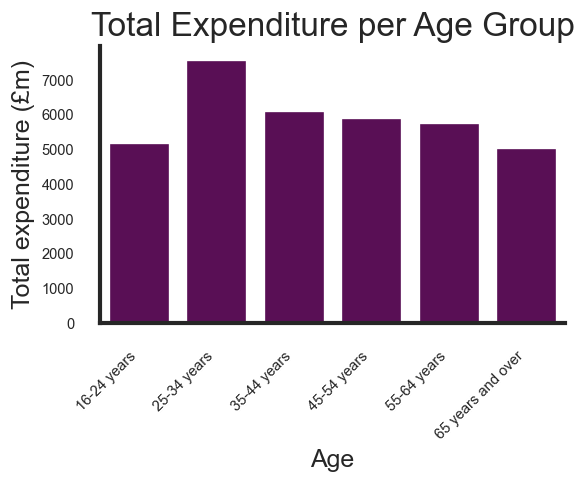

In [327]:
l=sns.barplot(data=(
    demographics
    .loc[(demographics.age != 'All') & (demographics.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('age')
    .value
    .sum()
    .reset_index(name='total_expenditure')
),
            x='age',
            y='total_expenditure',
            color='#650360')

sns.despine()
l.set_xlabel('Age', fontsize = 15)
l.set_ylabel('Total expenditure (£m)', fontsize = 15)
l.set_title('Total Expenditure per Age Group', fontsize = 20)

plt.xticks(rotation=45, ha='right')

plt.show()

25-34 year olds are the largest spenders overall and 16-24 being the lowest spenders - with the other age groups being relatively similar.

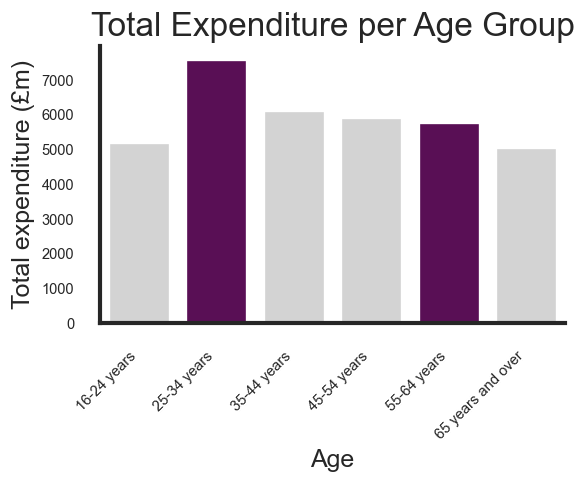

In [328]:
l=sns.barplot(data=(
    demographics
    .loc[(demographics.age != 'All') & (demographics.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('age')
    .value
    .sum()
    .reset_index(name='total_expenditure')
),
            x='age',
            y='total_expenditure',
            palette=['lightgrey', '#650360', 'lightgrey', 'lightgrey', '#650360', 'lightgrey'])

sns.despine()
l.set_xlabel('Age', fontsize = 15)
l.set_ylabel('Total expenditure (£m)', fontsize = 15)
l.set_title('Total Expenditure per Age Group', fontsize = 20)

plt.xticks(rotation=45, ha='right')

plt.show()

In [329]:
(
    demographics
    .loc[(demographics.year == 2017) &
        (demographics.breakdown_of_domestic_tourism == 'Visits')]
)

,year,units,value,breakdown_of_domestic_tourism,age,marital_status,gender,employment_status,children,access_to_car,social_grade,demo
10,2017,Million Visits,34,Visits,16-24 years,All,All,All,All,All,All,16-24 years
14,2017,Million Visits,31,Visits,25-34 years,All,All,All,All,All,All,25-34 years
17,2017,Million Visits,82,Visits,All,Married,All,All,All,All,All,Married
34,2017,Million Visits,20,Visits,45-54 years,All,All,All,All,All,All,45-54 years
64,2017,Million Visits,69,Visits,All,Not Married,All,All,All,All,All,Not Married
77,2017,Million Visits,20,Visits,35-44 years,All,All,All,All,All,All,35-44 years
80,2017,Million Visits,151,Visits,All,All,All,All,All,All,All,All
82,2017,Million Visits,73,Visits,All,All,Male,All,All,All,All,Male
84,2017,Million Visits,78,Visits,All,All,Female,All,All,All,All,Female
91,2017,Million Visits,31,Visits,All,All,All,All,All,All,C2,C2


Text(0.5, 1.0, 'Annual Expenditure from 25-34 Year Olds')

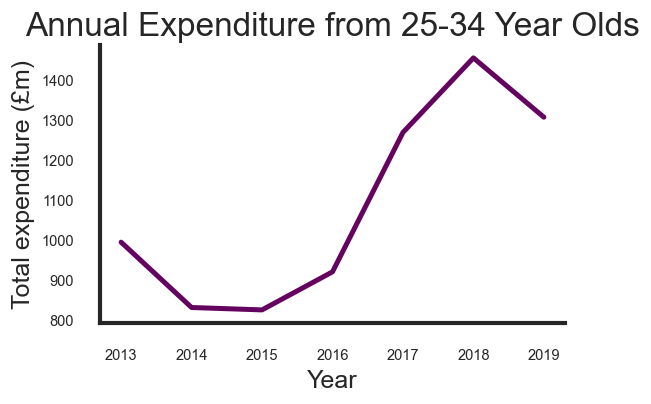

In [330]:
m=sns.lineplot(data=(
    demographics
    .loc[(demographics.age == '25-34 years') & (demographics.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby(['age', 'year'])
    .value
    .sum()
    .reset_index(name='total_expenditure_per_year')
),
             x='year',
             y='total_expenditure_per_year',
              color='#650360')

sns.despine()
m.set_xlabel('Year', fontsize = 15)
m.set_ylabel('Total expenditure (£m)', fontsize = 15)
m.set_title('Annual Expenditure from 25-34 Year Olds', fontsize = 20)

There was a big period of growth in terms of spending by this age group from 2016-2018, but had tailed off slightly by 2019.

Text(0.5, 1.0, 'Annual Expenditure from 55-64 Year Olds')

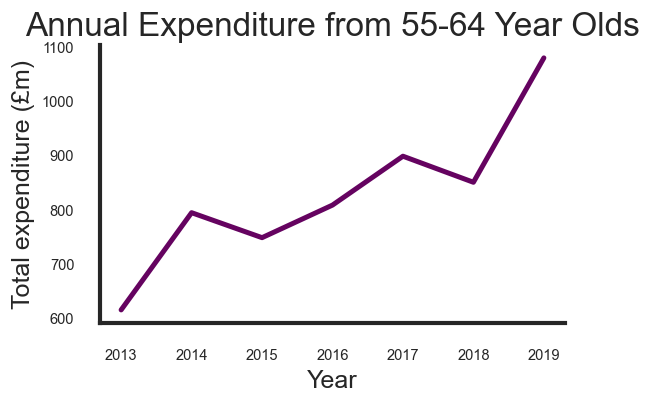

In [331]:
n=sns.lineplot(data=(
    demographics
    .loc[(demographics.age == '55-64 years') & (demographics.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby(['age', 'year'])
    .value
    .sum()
    .reset_index(name='total_expenditure_per_year')
),
             x='year',
             y='total_expenditure_per_year',
              color='#650360')

sns.despine()
n.set_xlabel('Year', fontsize = 15)
n.set_ylabel('Total expenditure (£m)', fontsize = 15)
n.set_title('Annual Expenditure from 55-64 Year Olds', fontsize = 20)

Text(0.5, 1.0, 'Annual Expenditure from Age Groups')

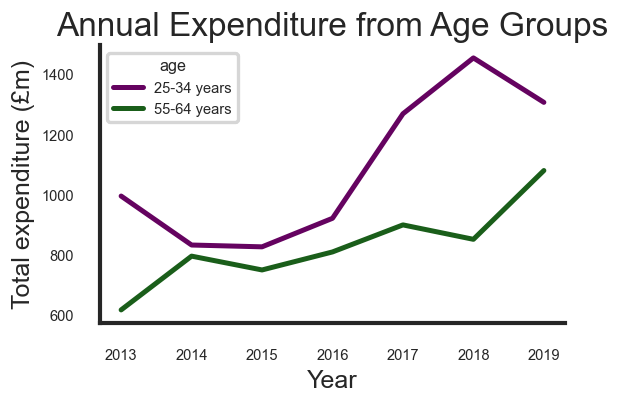

In [332]:
na=sns.lineplot(data=(
    demographics
    .loc[(demographics.age.isin(['25-34 years', '55-64 years'])) &
         (demographics.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby(['age', 'year'])
    .value
    .sum()
    .reset_index(name='total_expenditure_per_year')
),
             x='year',
             y='total_expenditure_per_year',
             hue='age',
             palette=['#650360', '#1a5e1a'])

sns.despine()
na.set_xlabel('Year', fontsize = 15)
na.set_ylabel('Total expenditure (£m)', fontsize = 15)
na.set_title('Annual Expenditure from Age Groups', fontsize = 20)

This age group has a promising upwards trajectory

In [333]:
(
    demographics
    .loc[(demographics.age != 'All') & (demographics.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('age')
    .value
    .sum()
    .sort_values(ascending=False)
)

age
16-24 years          184
25-34 years          173
65 years and over    164
55-64 years          158
35-44 years          141
45-54 years          126
Name: value, dtype: int64

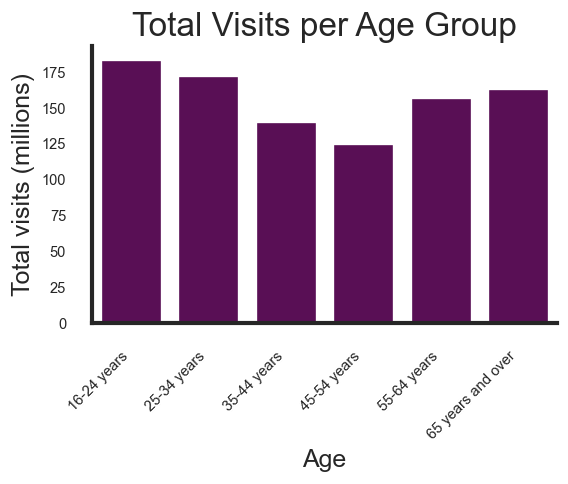

In [334]:
o=sns.barplot(data=(
    demographics
    .loc[(demographics.age != 'All') & (demographics.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('age')
    .value
    .sum()
    .reset_index(name='total_visits')
),
            x='age',
            y='total_visits',
            color='#650360')

sns.despine()
o.set_xlabel('Age', fontsize = 15)
o.set_ylabel('Total visits (millions)', fontsize = 15)
o.set_title('Total Visits per Age Group', fontsize = 20)

plt.xticks(rotation=45, ha='right')

plt.show()

Text(0.5, 1.0, 'Annual Visits from 25-34 Year Olds')

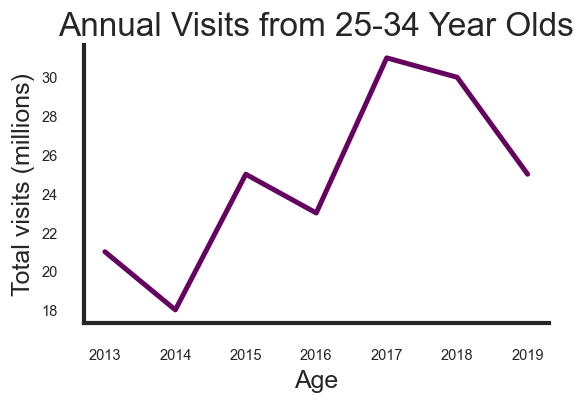

In [335]:
p=sns.lineplot(data=(
    demographics
    .loc[(demographics.age == '25-34 years') & (demographics.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby(['age', 'year'])
    .value
    .sum()
    .reset_index(name='total_expenditure_per_year')
),
             x='year',
             y='total_expenditure_per_year',
              color='#650360')
sns.despine()
p.set_xlabel('Age', fontsize = 15)
p.set_ylabel('Total visits (millions)', fontsize = 15)
p.set_title('Annual Visits from 25-34 Year Olds', fontsize = 20)

Text(0.5, 1.0, 'Annual Visits from 55-64 Year Olds')

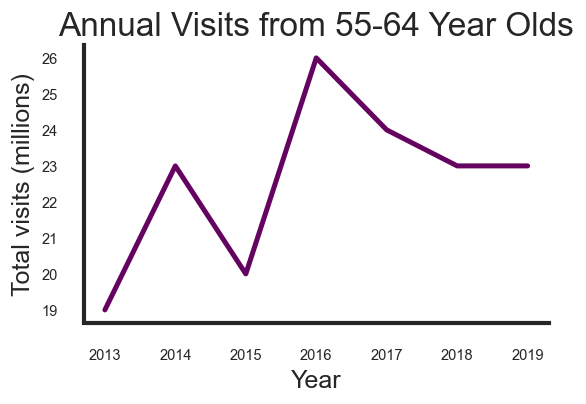

In [336]:
q=sns.lineplot(data=(
    demographics
    .loc[(demographics.age == '55-64 years') & (demographics.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby(['age', 'year'])
    .value
    .sum()
    .reset_index(name='total_expenditure_per_year')
),
             x='year',
             y='total_expenditure_per_year',
              color='#650360')

sns.despine()
q.set_xlabel('Year', fontsize = 15)
q.set_ylabel('Total visits (millions)', fontsize = 15)
q.set_title('Annual Visits from 55-64 Year Olds', fontsize = 20)

Text(0.5, 1.0, 'Annual Visits from Age Groups')

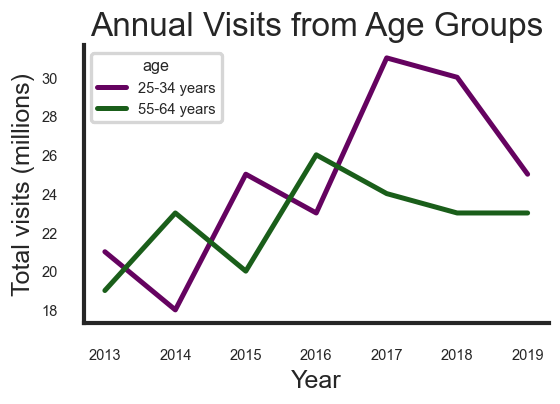

In [337]:
qa=sns.lineplot(data=(
    demographics
    .loc[(demographics.age.isin(['25-34 years', '55-64 years'])) &
         (demographics.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby(['age', 'year'])
    .value
    .sum()
    .reset_index(name='total_expenditure_per_year')
),
             x='year',
             y='total_expenditure_per_year',
             hue='age',
             palette=['#650360', '#1a5e1a'])

sns.despine()
qa.set_xlabel('Year', fontsize = 15)
qa.set_ylabel('Total visits (millions)', fontsize = 15)
qa.set_title('Annual Visits from Age Groups', fontsize = 20)

Look at access to car demographic

In [338]:
(
    demographics
    .loc[(demographics.access_to_car != 'All') & (demographics.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('access_to_car')
    .value
    .sum()
    .sort_values(ascending=False)
)

access_to_car
Access to car (1+)      30623
No access to car (0)     5128
Name: value, dtype: int64

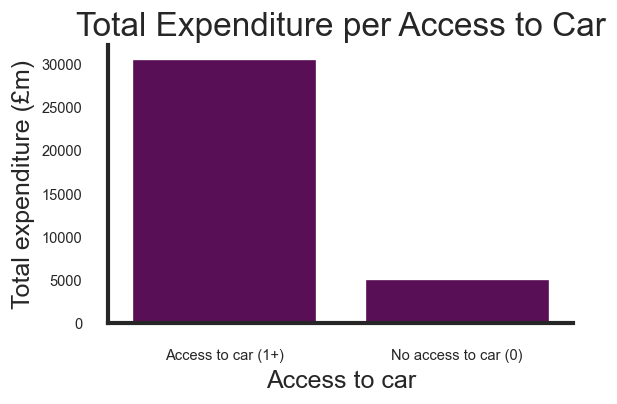

In [339]:
r=sns.barplot(data=(
    demographics
    .loc[(demographics.access_to_car != 'All') & (demographics.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('access_to_car')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
),
            x='access_to_car',
            y='total_expenditure',
            color='#650360')

sns.despine()
r.set_xlabel('Access to car', fontsize = 15)
r.set_ylabel('Total expenditure (£m)', fontsize = 15)
r.set_title('Total Expenditure per Access to Car', fontsize = 20)


plt.show()

Text(0.5, 1.0, 'Annual Expenditure from Access to Car Demographic')

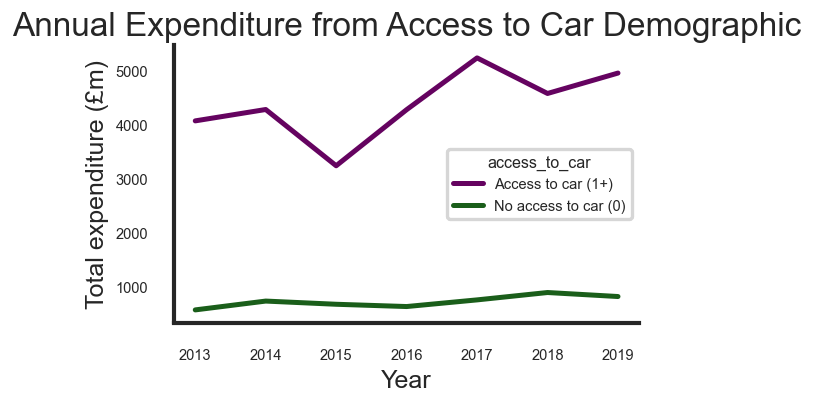

In [340]:
s=sns.lineplot(data=(
    demographics
    .loc[(demographics.access_to_car != 'All') & (demographics.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby(['access_to_car', 'year'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
),
            x='year',
            y='total_expenditure',
            hue='access_to_car',
            palette=['#650360', '#1a5e1a'])

sns.despine()
s.set_xlabel('Year', fontsize = 15)
s.set_ylabel('Total expenditure (£m)', fontsize = 15)
s.set_title('Annual Expenditure from Access to Car Demographic', fontsize = 20)

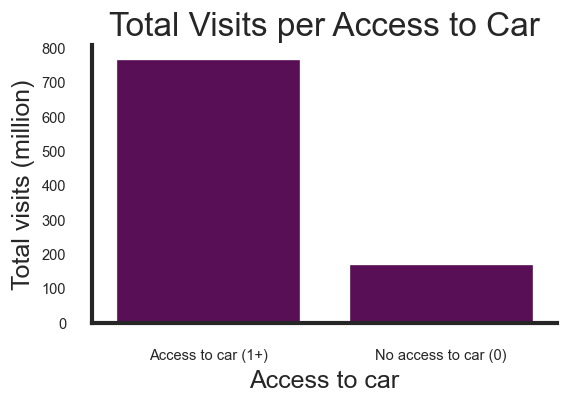

In [341]:
t=sns.barplot(data=(
    demographics
    .loc[(demographics.access_to_car != 'All') & (demographics.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('access_to_car')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
),
            x='access_to_car',
            y='total_visits',
            color='#650360')

sns.despine()
t.set_xlabel('Access to car', fontsize = 15)
t.set_ylabel('Total visits (million)', fontsize = 15)
t.set_title('Total Visits per Access to Car', fontsize = 20)

plt.show()

Text(0.5, 1.0, 'Annual Visits from Access to Car Demographic')

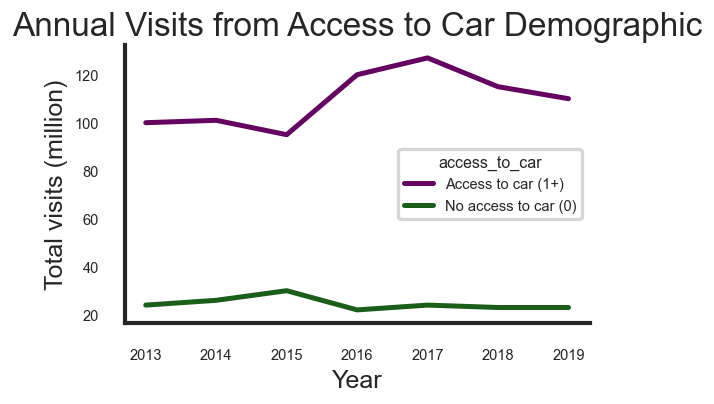

In [342]:
u=sns.lineplot(data=(
    demographics
    .loc[(demographics.access_to_car != 'All') & (demographics.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby(['access_to_car', 'year'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
),
            x='year',
            y='total_visits',
            hue='access_to_car',
            palette=['#650360', '#1a5e1a'])

sns.despine()
u.set_xlabel('Year', fontsize = 15)
u.set_ylabel('Total visits (million)', fontsize = 15)
u.set_title('Annual Visits from Access to Car Demographic', fontsize = 20)

# Question 3

## What type of locations receive the most visits?
## What kinds of locations do people spend the most in?

In [343]:
(
    locations
    .loc[(locations.breakdown_of_domestic_tourism == 'Expenditure') & (locations.location_type != 'All'), :]
    .groupby('location_type')
    .value
    .sum()
    .sort_values(ascending=False)
)

location_type
City               20497
Town or Village    12225
Seaside             3816
Countryside         3788
Name: value, dtype: int64

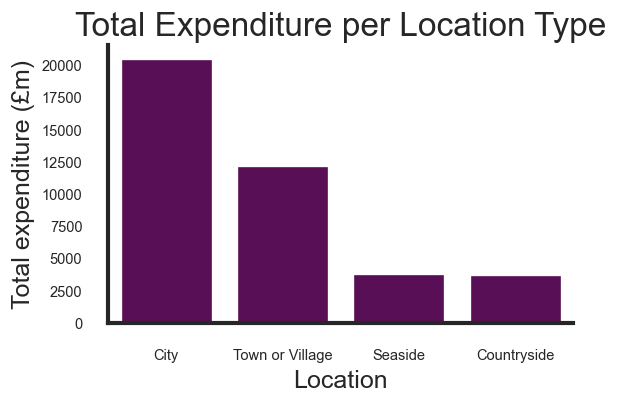

In [344]:
v=sns.barplot(data=(
    locations
    .loc[(locations.breakdown_of_domestic_tourism == 'Expenditure') & (locations.location_type != 'All'), :]
    .groupby('location_type')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
),
            x='location_type',
            y='total_expenditure',
            color='#650360')

sns.despine()
v.set_xlabel('Location', fontsize = 15)
v.set_ylabel('Total expenditure (£m)', fontsize = 15)
v.set_title('Total Expenditure per Location Type', fontsize = 20)

plt.xticks(rotation=0, ha='center')
plt.show()

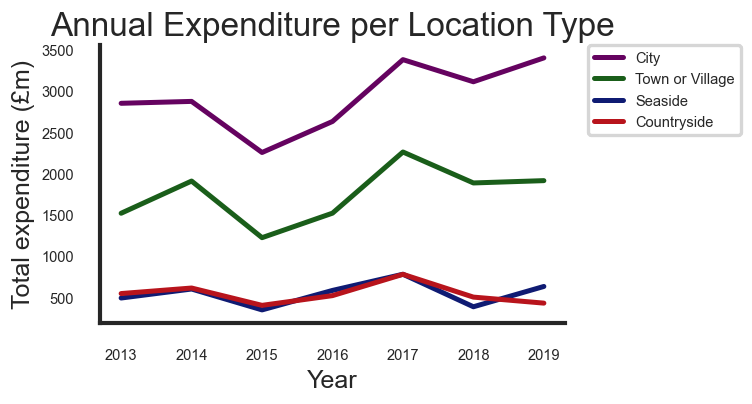

In [401]:
sns.set_style('white')

sns.set_context('poster', font_scale=0.4)
plt.rcParams['figure.figsize'] = [5, 3]
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 10
w=sns.lineplot(data=(
    locations
    .loc[(locations.breakdown_of_domestic_tourism == 'Expenditure') &
         (locations.location_type != 'All'), :]
    .groupby(['location_type', 'year'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure_per_year')
),
            x='year',
            y='total_expenditure_per_year',
            hue='location_type',
            palette=['#650360', '#1a5e1a', '#0f1b73', '#b8141c'])

sns.despine()
w.set_xlabel('Year', fontsize = 15)
w.set_ylabel('Total expenditure (£m)', fontsize = 15)
w.set_title('Annual Expenditure per Location Type', fontsize = 20)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

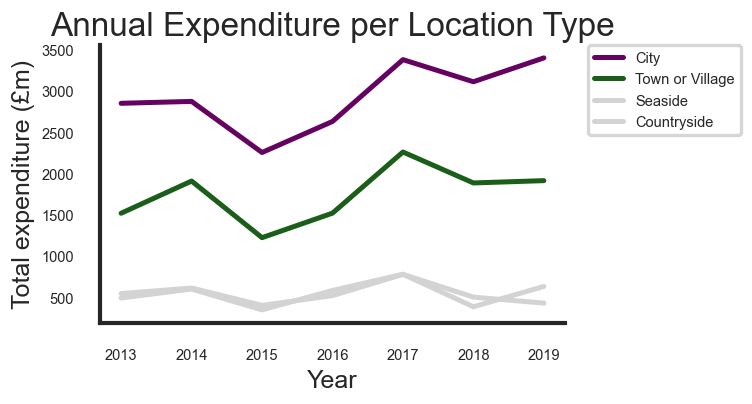

In [400]:
sns.set_style('white')

sns.set_context('poster', font_scale=0.4)
plt.rcParams['figure.figsize'] = [5, 3]
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 10
w=sns.lineplot(data=(
    locations
    .loc[(locations.breakdown_of_domestic_tourism == 'Expenditure') &
         (locations.location_type != 'All'), :]
    .groupby(['location_type', 'year'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure_per_year')
),
            x='year',
            y='total_expenditure_per_year',
            hue='location_type',
            palette=['#650360', '#1a5e1a', 'lightgrey', 'lightgrey'],
            linewidth=3)

sns.despine()
w.set_xlabel('Year', fontsize = 15)
w.set_ylabel('Total expenditure (£m)', fontsize = 15)
w.set_title('Annual Expenditure per Location Type', fontsize = 20)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [346]:
(
    locations
    .loc[(locations.breakdown_of_domestic_tourism == 'Visits') & (locations.location_type != 'All'), :]
    .groupby('location_type')
    .value
    .sum()
    .sort_values(ascending=False)
)

location_type
City               431
Town or Village    360
Countryside        133
Seaside            108
Name: value, dtype: int64

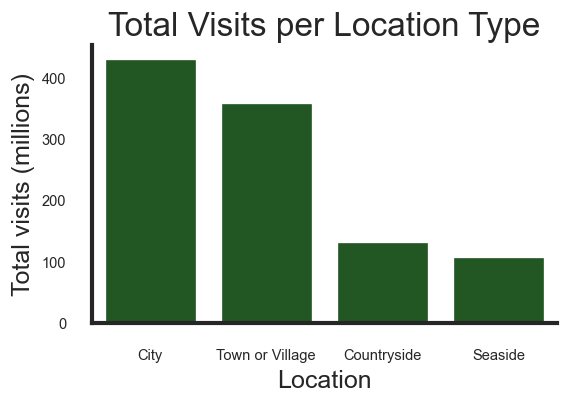

In [347]:
w=sns.barplot(data=(
    locations
    .loc[(locations.breakdown_of_domestic_tourism == 'Visits') & (locations.location_type != 'All'), :]
    .groupby('location_type')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
),
            x='location_type',
            y='total_visits',
            color='#1a5e1a')

sns.despine()
w.set_xlabel('Location', fontsize = 15)
w.set_ylabel('Total visits (millions)', fontsize = 15)
w.set_title('Total Visits per Location Type', fontsize = 20)

plt.xticks(rotation=0, ha='center')
plt.show()

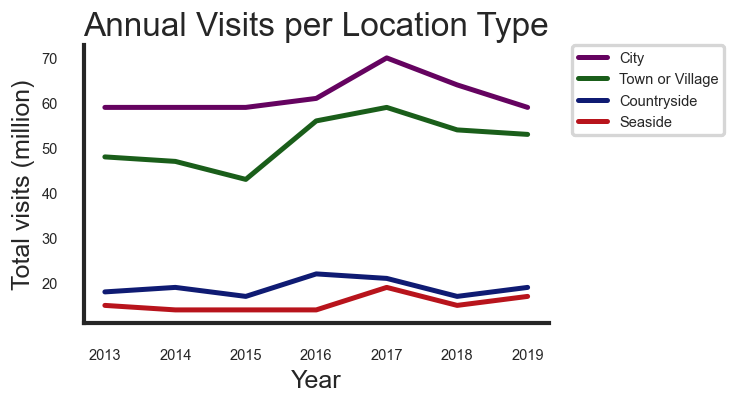

In [348]:
w=sns.lineplot(data=(
    locations
    .loc[(locations.breakdown_of_domestic_tourism == 'Visits') &
         (locations.location_type != 'All'), :]
    .groupby(['location_type', 'year'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits_per_year')
),
            x='year',
            y='total_visits_per_year',
            hue='location_type',
            palette=['#650360', '#1a5e1a', '#0f1b73', '#b8141c'])

sns.despine()
w.set_xlabel('Year', fontsize = 15)
w.set_ylabel('Total visits (million)', fontsize = 15)
w.set_title('Annual Visits per Location Type', fontsize = 20)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

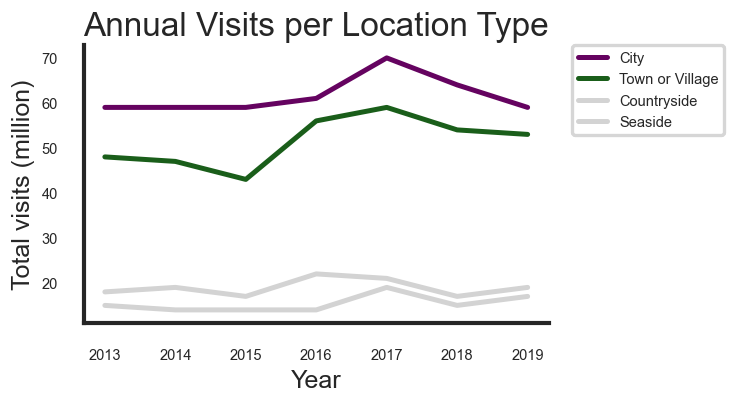

In [403]:
sns.set_style('white')

sns.set_context('poster', font_scale=0.4)
plt.rcParams['figure.figsize'] = [5, 3]
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 10

w=sns.lineplot(data=(
    locations
    .loc[(locations.breakdown_of_domestic_tourism == 'Visits') &
         (locations.location_type != 'All'), :]
    .groupby(['location_type', 'year'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits_per_year')
),
            x='year',
            y='total_visits_per_year',
            hue='location_type',
            palette=['#650360', '#1a5e1a',  'lightgrey', 'lightgrey'],
            linewidth=3)

sns.despine()
w.set_xlabel('Year', fontsize = 15)
w.set_ylabel('Total visits (million)', fontsize = 15)
w.set_title('Annual Visits per Location Type', fontsize = 20)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Question 4

## Is there a particular method of travel our visitors arrive by?

In [349]:
(
    transport
    .loc[(transport.transport_type != 'All') & (transport.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('transport_type')
    .value
    .sum()
    .sort_values(ascending=False)
)

transport_type
Car      633.2
Rail     111.2
Other     94.6
Bus       90.5
Plane      7.1
Boat       3.3
Name: value, dtype: float64

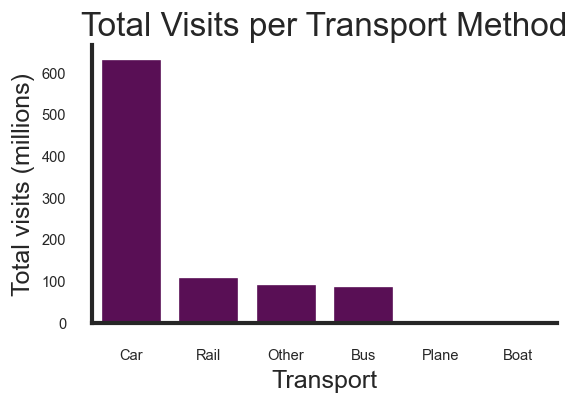

In [350]:
x=sns.barplot(data=(
    transport
    .loc[(transport.transport_type != 'All') & (transport.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('transport_type')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
),
            x='transport_type',
            y='total_visits',
            color='#650360')

sns.despine()
x.set_xlabel('Transport', fontsize = 15)
x.set_ylabel('Total visits (millions)', fontsize = 15)
x.set_title('Total Visits per Transport Method', fontsize = 20)

plt.xticks(rotation=0, ha='center')
plt.show()

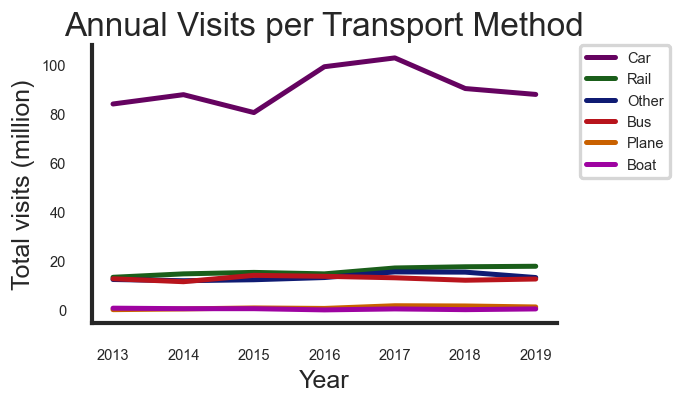

In [351]:
y=sns.lineplot(data=(
    transport
    .loc[(transport.transport_type != 'All') & (transport.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby(['transport_type', 'year'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
),
            x='year',
            y='total_visits',
        hue='transport_type',
        palette=['#650360', '#1a5e1a', '#0f1b73', '#b8141c', '#c96100', '#9e03a1'])

sns.despine()
y.set_xlabel('Year', fontsize = 15)
y.set_ylabel('Total visits (million)', fontsize = 15)
y.set_title('Annual Visits per Transport Method', fontsize = 20)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

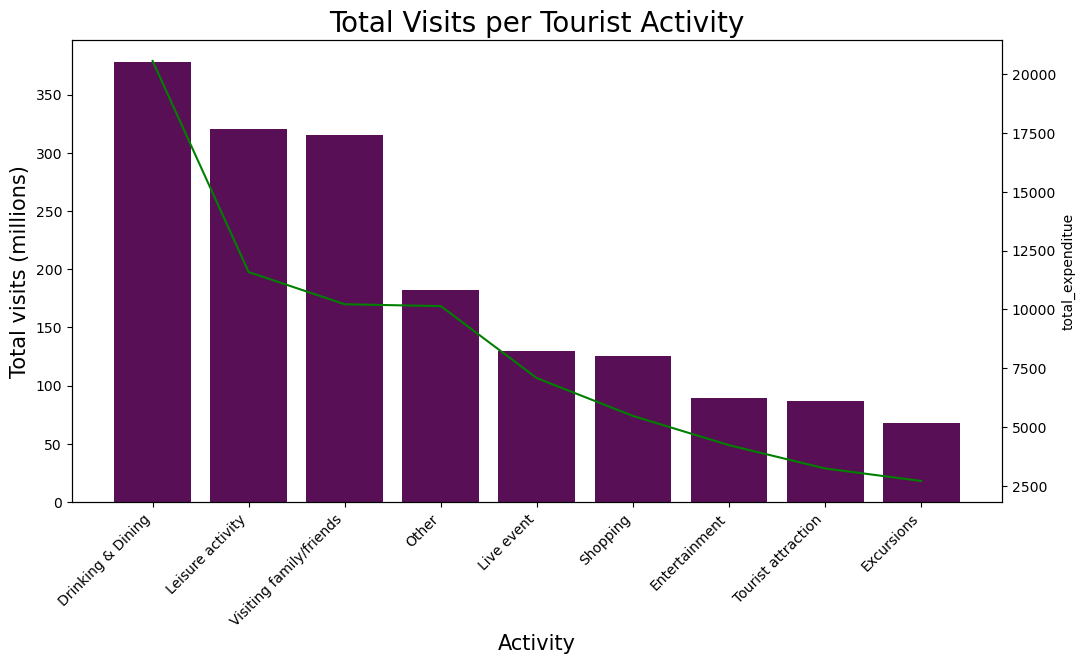

In [352]:
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))


f=sns.barplot(data=(
    activities
    .loc[(activities.activity_type != 'All') & (activities.breakdown_of_domestic_tourism == 'Visits'), :]
    .groupby('activity_type')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
),
            x='activity_type',
            y='total_visits',
           color='#650360',
           ax=ax1)

f.set_xlabel('Activity', fontsize = 15)
f.set_ylabel('Total visits (millions)', fontsize = 15)
f.set_title('Total Visits per Tourist Activity', fontsize = 20)

plt.xticks(rotation=45, ha='right')



ax2 = ax1.twinx()

sns.lineplot(data=(
    activities
    .loc[(activities.activity_type != 'All') &
         (activities.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('activity_type')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditue')
),
             x='activity_type',
             y='total_expenditue',
             sort=True,
           color='g',
           ax=ax2)

plt.show()

In [353]:
usa = pd.read_csv('clean_data/usa.csv')

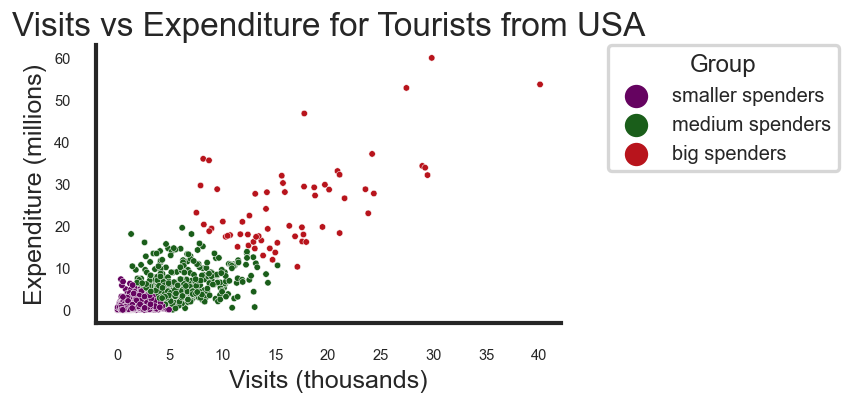

In [406]:
z=sns.scatterplot(data=usa,
               x='visits_thousands',
               y='expenditure_millions',
               hue='cluster_group',
               s=15,
               palette=['#650360', '#1a5e1a', '#b8141c'])

sns.despine()
z.set_xlabel('Visits (thousands)', fontsize = 15)
z.set_ylabel('Expenditure (millions)', fontsize = 15)
z.set_title('Visits vs Expenditure for Tourists from USA', fontsize = 20)
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left',
           borderaxespad=0, title='Group', title_fontsize='x-large', fontsize='large')

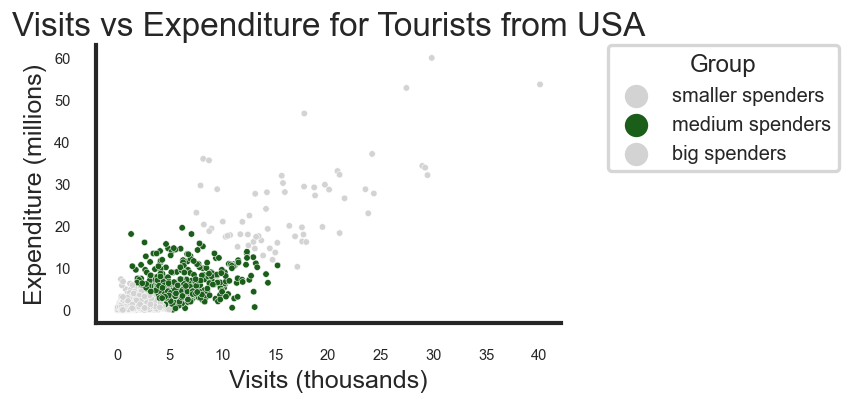

In [405]:
sns.set_style('white')
z=sns.scatterplot(data=usa,
               x='visits_thousands',
               y='expenditure_millions',
               hue='cluster_group',
               s=15,
               palette=['lightgrey', '#1a5e1a', 'lightgrey'])

sns.despine()
z.set_xlabel('Visits (thousands)', fontsize = 15)
z.set_ylabel('Expenditure (millions)', fontsize = 15)
z.set_title('Visits vs Expenditure for Tourists from USA', fontsize = 20)
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper left',
           borderaxespad=0, title='Group', title_fontsize='x-large', fontsize='large')

In [355]:
(
    usa
    .loc[usa.visits_thousands > 30, :]
)

,year,country,purpose,mode,duration,age,visits_thousands,nights_thousands,expenditure_millions,cluster_group
3141,2017,USA,Holiday,Air,8-14 nights,55-64,40.093943,319.57191,53.725776,big spenders


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

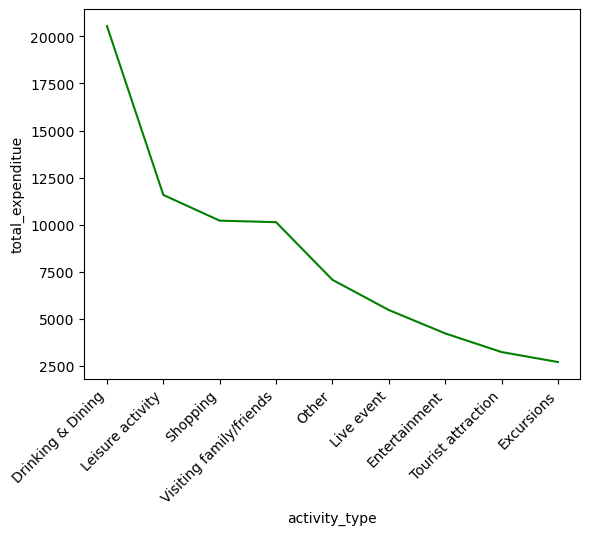

In [356]:
sns.lineplot(data=(
    activities
    .loc[(activities.activity_type != 'All') &
         (activities.breakdown_of_domestic_tourism == 'Expenditure'), :]
    .groupby('activity_type')
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditue')
),
             x='activity_type',
             y='total_expenditue',
            markers='o',
             sort='True',
           color='g')

plt.xticks(rotation=45, ha='right')

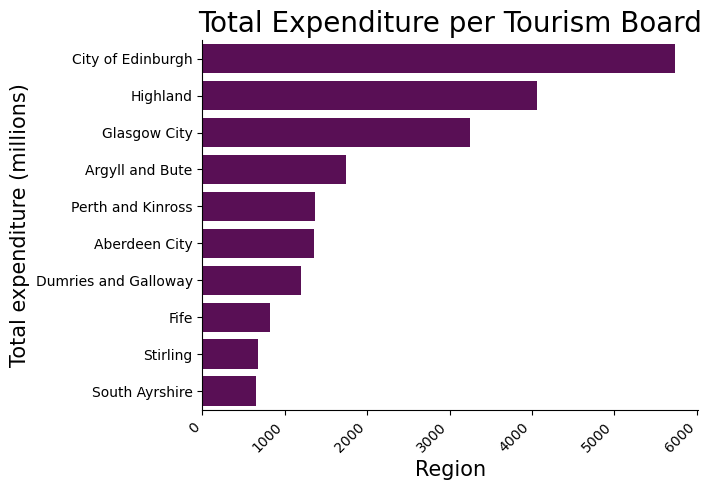

In [364]:
aa=sns.barplot(data=(
    regional_tourism
    .loc[(regional_tourism.featurecode != 'S92000003') &
         (regional_tourism.breakdown_of_domestic_tourism == 'Expenditure') &
         (regional_tourism.region_of_residence == 'All of GB'), :]
    .groupby(['region_of_residence', 'region_name'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
    .head(10)
),
            x='total_expenditure',
            y='region_name',
              color='#650360')

sns.despine()

aa.set_xlabel('Region', fontsize = 15)
aa.set_ylabel('Total expenditure (millions)', fontsize = 15)
aa.set_title('Top 10 Expenditures per Tourism Board', fontsize = 20)

plt.xticks(rotation=45, ha='right')

plt.show()

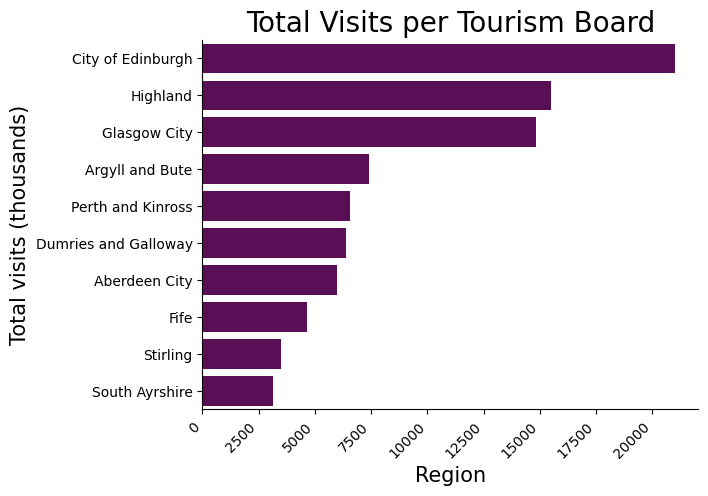

In [366]:
ba=sns.barplot(data=(
    regional_tourism
    .loc[(regional_tourism.featurecode != 'S92000003') &
         (regional_tourism.breakdown_of_domestic_tourism == 'Visits') &
         (regional_tourism.region_of_residence == 'All of GB'), :]
    .groupby(['region_of_residence', 'region_name'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_visits')
    .head(10)
),
            x='total_visits',
            y='region_name',
              color='#650360')

sns.despine()

ba.set_xlabel('Region', fontsize = 15)
ba.set_ylabel('Total visits (thousands)', fontsize = 15)
ba.set_title('Total Visits per Tourism Board', fontsize = 20)

plt.xticks(rotation=45, ha='right')

plt.show()

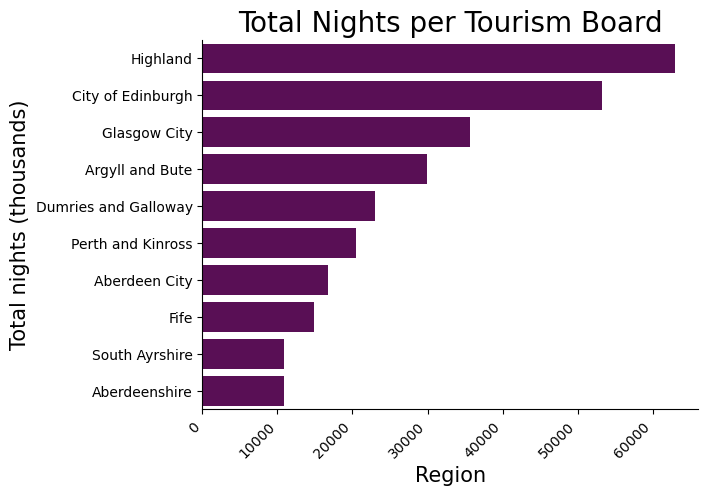

In [369]:
ca=sns.barplot(data=(
    regional_tourism
    .loc[(regional_tourism.featurecode != 'S92000003') &
         (regional_tourism.breakdown_of_domestic_tourism == 'Nights') &
         (regional_tourism.region_of_residence == 'All of GB'), :]
    .groupby(['region_of_residence', 'region_name'])
    .value
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_nights')
    .head(10)
),
            x='total_nights',
            y='region_name',
              color='#650360')

sns.despine()

ca.set_xlabel('Region', fontsize = 15)
ca.set_ylabel('Total nights (thousands)', fontsize = 15)
ca.set_title('Total Nights per Tourism Board', fontsize = 20)

plt.xticks(rotation=45, ha='right')

plt.show()

In [370]:
regional_tourism

,featurecode,years,units,value,region_of_residence,breakdown_of_domestic_tourism,region_name
0,S12000039,2016-2018,million pounds (GBP),8,England,Expenditure,West Dunbartonshire
1,S12000039,2015-2017,Thousand Nights,140,All of GB,Nights,West Dunbartonshire
2,S12000039,2015-2017,million pounds (GBP),8,England,Expenditure,West Dunbartonshire
3,S12000039,2017-2019,Thousand Nights,76,England,Nights,West Dunbartonshire
4,S12000039,2009-2011,Thousand Visits,68,Scotland,Visits,West Dunbartonshire
...,...,...,...,...,...,...,...
2668,S12000050,2012-2014,million pounds (GBP),18,England,Expenditure,North Lanarkshire
2669,S12000050,2009-2011,Thousand Visits,113,England,Visits,North Lanarkshire
2670,S12000050,2009-2011,Thousand Nights,640,All of GB,Nights,North Lanarkshire
2671,S12000050,2015-2017,million pounds (GBP),12,England,Expenditure,North Lanarkshire


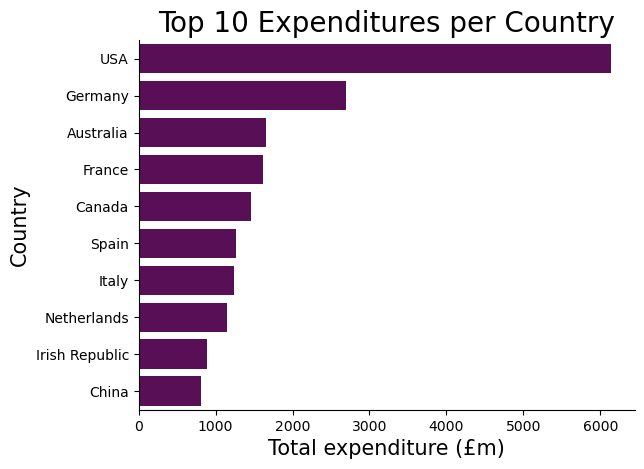

In [373]:
da=sns.barplot(data=(
    international
    .groupby('country')
    .expenditure_millions
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
    .head(10)
),
            x='total_expenditure',
            y='country',
            color='#650360')

sns.despine()

da.set_xlabel('Total expenditure (£m)', fontsize = 15)
da.set_ylabel('Country', fontsize = 15)
da.set_title('Top 10 Expenditures per Country', fontsize = 20)

plt.xticks(rotation=0, ha='center')

plt.show()

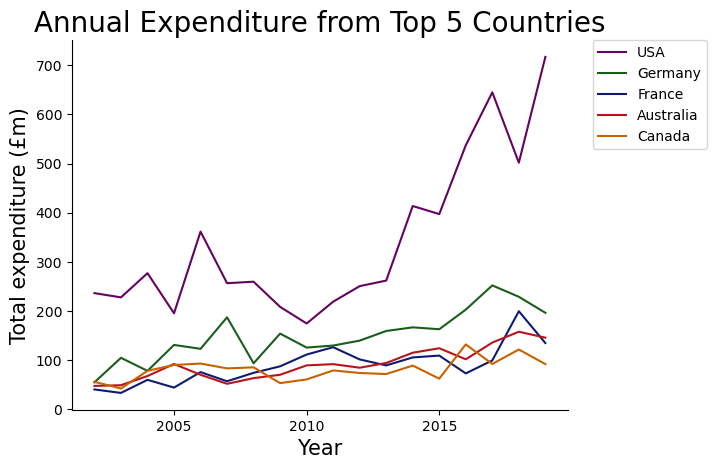

In [378]:
ea=sns.lineplot(data=(
    international
    .loc[international.country.isin(['USA', 'Germany', 'Australia', 'France', 'Canada'])]
    .groupby(['country', 'year'])
    .expenditure_millions
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
),
            x='year',
            y='total_expenditure',
            hue='country',
        palette=['#650360', '#1a5e1a', '#0f1b73', '#b8141c', '#c96100'])

sns.despine()
ea.set_xlabel('Year', fontsize = 15)
ea.set_ylabel('Total expenditure (£m)', fontsize = 15)
ea.set_title('Annual Expenditure from Top 5 Countries', fontsize = 20)
plt.locator_params(axis="x", integer=True)


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

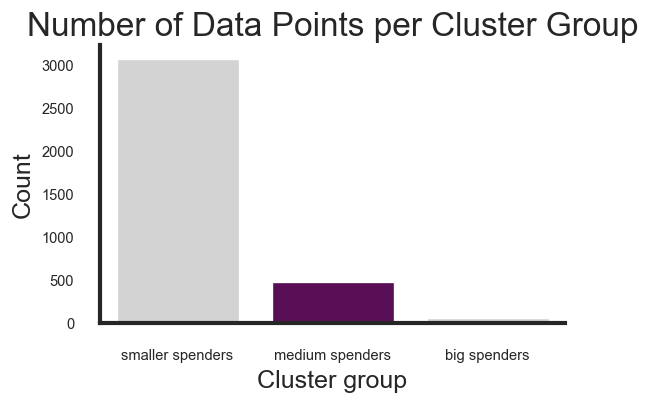

In [409]:
fa=sns.barplot(data=(
    usa
    .groupby('cluster_group')
    .expenditure_millions
    .count()
    .sort_values(ascending=False)
    .reset_index(name='total_number')
),
            y='total_number',
            x='cluster_group',
            palette=['lightgrey', '#650360', 'lightgrey'])

sns.despine()

fa.set_xlabel('Cluster group', fontsize = 15)
fa.set_ylabel('Count', fontsize = 15)
fa.set_title('Number of Data Points per Cluster Group', fontsize = 20)

plt.xticks(rotation=0, ha='center')

plt.show()

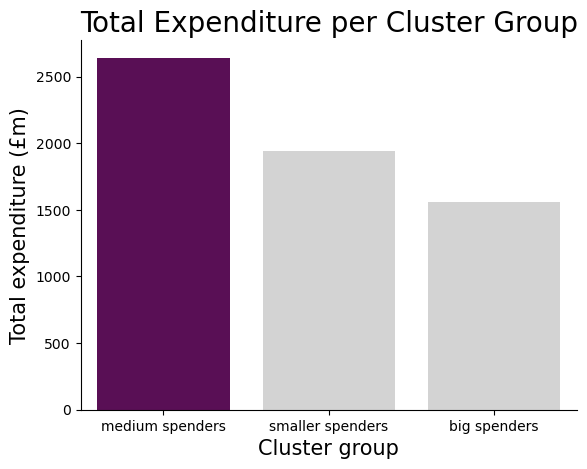

In [388]:
fa=sns.barplot(data=(
    usa
    .groupby('cluster_group')
    .expenditure_millions
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_expenditure')
),
            y='total_expenditure',
            x='cluster_group',
            palette=['#650360', 'lightgrey', 'lightgrey'])

sns.despine()

fa.set_xlabel('Cluster group', fontsize = 15)
fa.set_ylabel('Total expenditure (£m)', fontsize = 15)
fa.set_title('Total Expenditure per Cluster Group', fontsize = 20)

plt.xticks(rotation=0, ha='center')

plt.show()

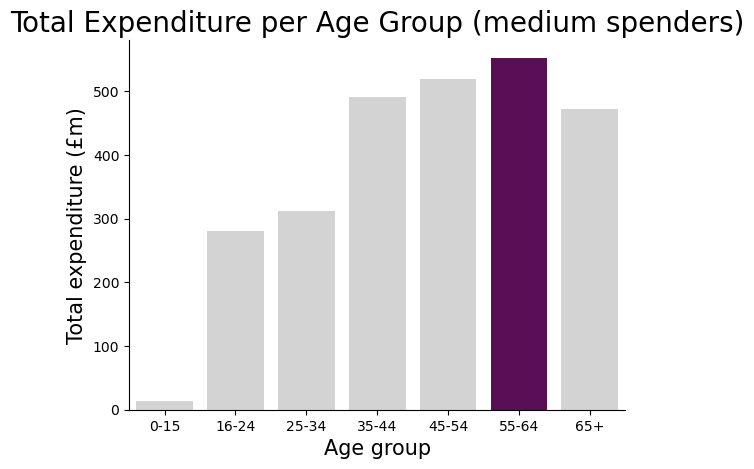

In [387]:
ga=sns.barplot(data=(
    usa
    .loc[usa.cluster_group == 'medium spenders', :]
    .groupby('age')
    .expenditure_millions
    .sum()
    .reset_index(name='total_expenditure')
),
            y='total_expenditure',
            x='age',
            palette=['lightgrey', 'lightgrey', 'lightgrey', 'lightgrey',
                     'lightgrey', '#650360', 'lightgrey'])

sns.despine()

ga.set_xlabel('Age group', fontsize = 15)
ga.set_ylabel('Total expenditure (£m)', fontsize = 15)
ga.set_title('Total Expenditure per Age Group (medium spenders)', fontsize = 20)

plt.xticks(rotation=0, ha='center')

plt.show()